In [117]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os
import warnings
from matplotlib import pyplot as plt
from matplotlib import axes
warnings.simplefilter(action='ignore')
%matplotlib inline

provinces = [10, 41, 50, 70, 90]

In [83]:
# start with the "default" prophet
# just load all the files first....I guess....ugh

monthly_errors_1 = pd.read_csv('D:/School/Thesis/output/default_prophet/all_prov_monthly/all_prov_monthly_1/monthly_errors_1.csv')
monthly_errors_1['province'] = monthly_errors_1['province'].astype(int)
monthly_errors_1['year'] = monthly_errors_1['year'].astype(int)
monthly_errors_1['peak_month_error'] = monthly_errors_1['peak_month_error'].astype(int)

monthly_errors_1.head()

,province,year,monthly_case_rmse,year_total_error,peak_error,peak_month_error
0,10,2007,6918.611158,68055.133816,1021.902836,0
1,10,2008,354.612023,3175.230127,657.240202,4
2,10,2009,350.743696,4024.685753,289.928920,1
3,10,2010,261.048009,582.812746,357.389466,0
4,10,2011,235.575738,899.041839,60.443342,4


In [165]:
# loads the error dataframe
def load_error_df(how_many_years_out=1):
    # load the data
    file_path = 'D:/School/Thesis/output/default_prophet/all_prov_monthly/all_prov_monthly_' + str(how_many_years_out) + '/monthly_errors_' + str(how_many_years_out) + '.csv'
    error_df = pd.read_csv(file_path)
    error_df['province'] = error_df['province'].astype(int)
    error_df['year'] = error_df['year'].astype(int)
    # monthly_errors['peak_month_error'] = monthly_errors['peak_month_error'].astype(int)
    
    return error_df

In [155]:
# makes a graph for specified province, however many years out
def make_a_graph(province, df, how_many_years_out=1):
    prov_df = df.loc[df['province'] == province]
    ax = sns.barplot(x='year', y='monthly_case_rmse', data=prov_df, palette="Blues_d", ci=0)
    # plt.ylim(0, 1500)
    ax.set(xlabel='Year', ylabel='RMSE for Monthly Case Counts')
    plt.title('Province ' + str(province) + ', ' + str(how_many_years_out) + ' Year(s) Out')
    plt.show()

In [156]:
# makes a graph for each province for provinces made the specified number of years out
def make_a_buncha_graphs(how_many_years_out=1):
    monthly_errors = load_error_df('D:/School/Thesis/output/default_prophet/all_prov_monthly/all_prov_monthly_' + str(how_many_years_out) + '/monthly_errors_' + str(how_many_years_out) + '.csv')

    for province in provinces:
        make_a_graph(province, monthly_errors, how_many_years_out)

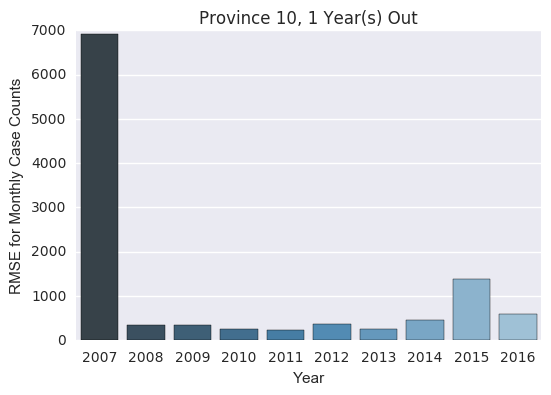

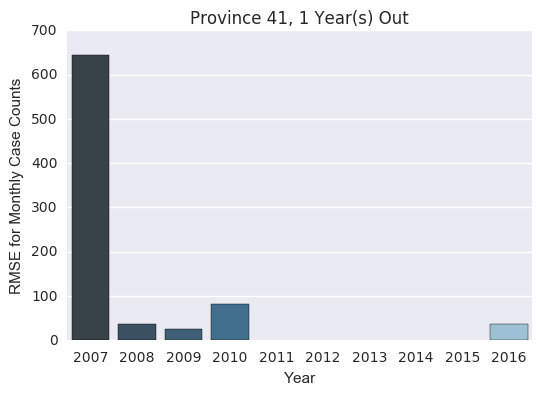

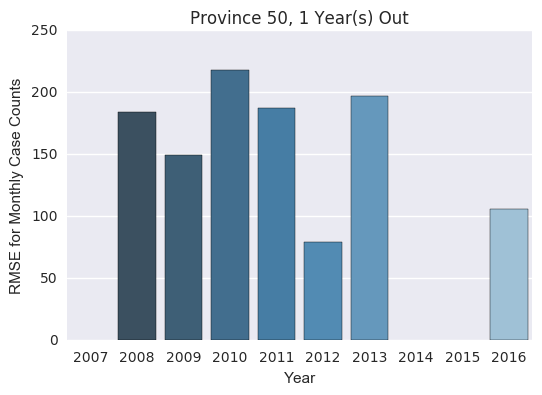

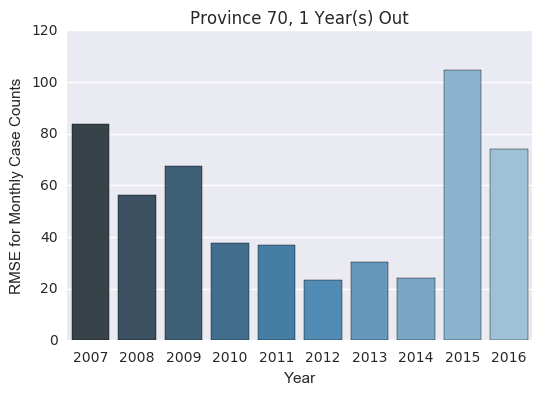

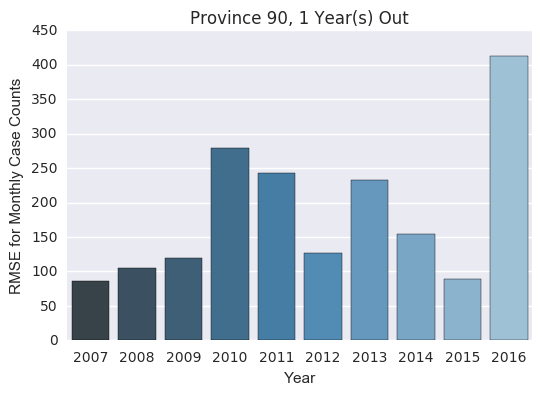

In [154]:
make_a_buncha_graphs()

In [160]:
# makes a graph for specified province, however many years out
def make_a_graph(province, df, how_many_years_out=1):
    prov_df = df.loc[df['province'] == province]
    ax = sns.barplot(x='year', y='peak_month_error', data=prov_df, palette="Blues_d", ci=0)
    # plt.ylim(0, 1500)
    ax.set(xlabel='Year', ylabel='Absolute Error in Peak Month')
    plt.title('Province ' + str(province) + ', ' + str(how_many_years_out) + ' Year(s) Out')
    plt.show()

In [161]:
def make_a_buncha_graphs(how_many_years_out=1):
    monthly_errors = load_error_df('D:/School/Thesis/output/default_prophet/all_prov_monthly/all_prov_monthly_' + str(how_many_years_out) + '/monthly_errors_' + str(how_many_years_out) + '.csv')

    for province in provinces:
        make_a_graph(province, monthly_errors, how_many_years_out)

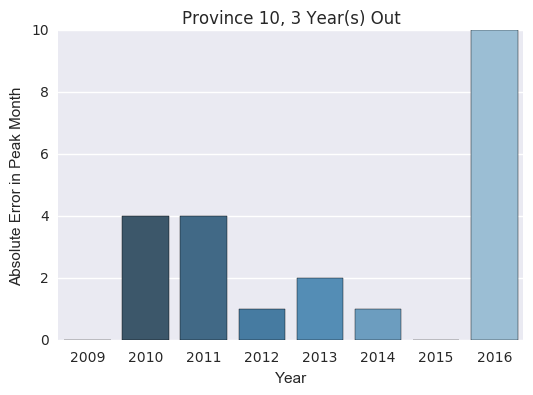

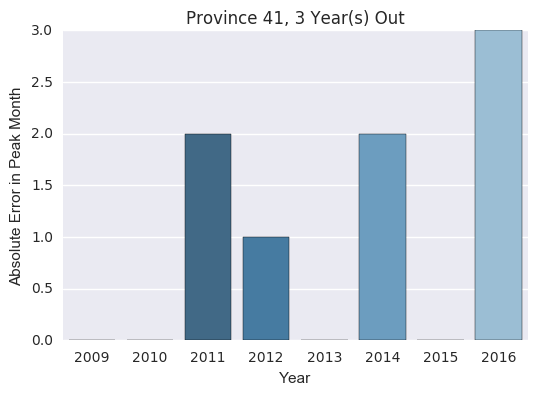

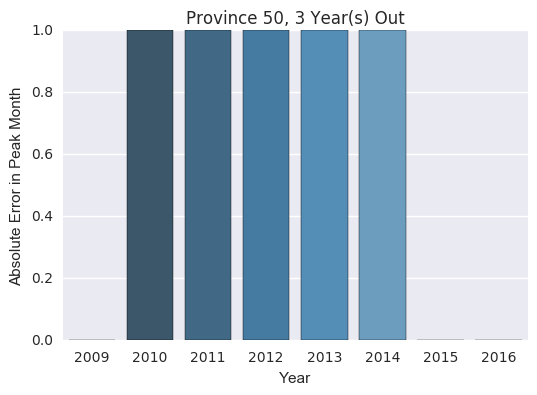

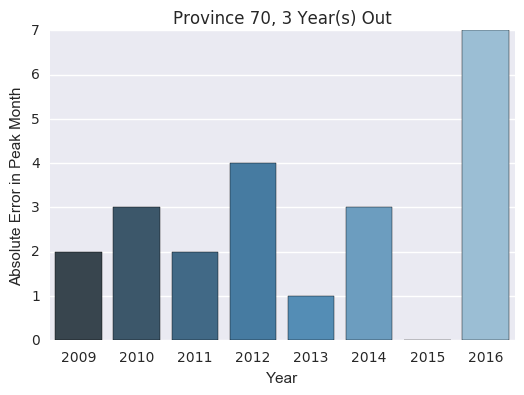

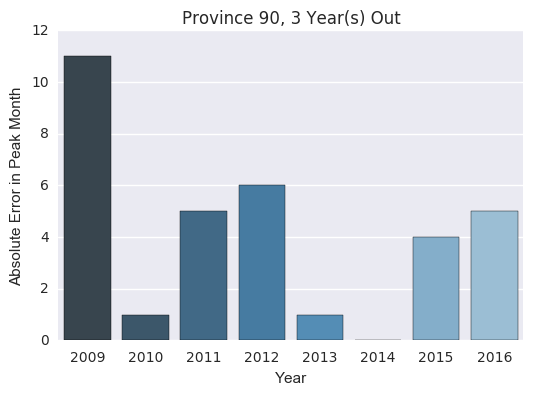

In [164]:
make_a_buncha_graphs(3)

In [178]:
# make a dataframe for each year out, df_1 has forecasts one year out, df_2 forecasts 2 years out, etc
df_1 = load_error_df(1)
df_2 = load_error_df(2)
df_3 = load_error_df(3)
df_4 = load_error_df(4)
df_5 = load_error_df(5)
df_6 = load_error_df(6)
df_7 = load_error_df(7)
df_8 = load_error_df(8)
df_9 = load_error_df(9)
df_10 = load_error_df(10)

In [182]:
df_1['how_many_years_out'] = 1
df_2['how_many_years_out'] = 2
df_3['how_many_years_out'] = 3
df_4['how_many_years_out'] = 4
df_5['how_many_years_out'] = 5
df_6['how_many_years_out'] = 6
df_7['how_many_years_out'] = 7
df_8['how_many_years_out'] = 8
df_9['how_many_years_out'] = 9
df_10['how_many_years_out'] = 10

In [183]:
all_years_out_df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10])
all_years_out_df.head()

,province,year,monthly_case_rmse,year_total_error,peak_error,peak_month_error,how_many_years_out
0,10,2007,6918.611158,68055.133816,1021.902836,0.0,1
1,10,2008,354.612023,3175.230127,657.240202,4.0,1
2,10,2009,350.743696,4024.685753,289.928920,1.0,1
3,10,2010,261.048009,582.812746,357.389466,0.0,1
4,10,2011,235.575738,899.041839,60.443342,4.0,1


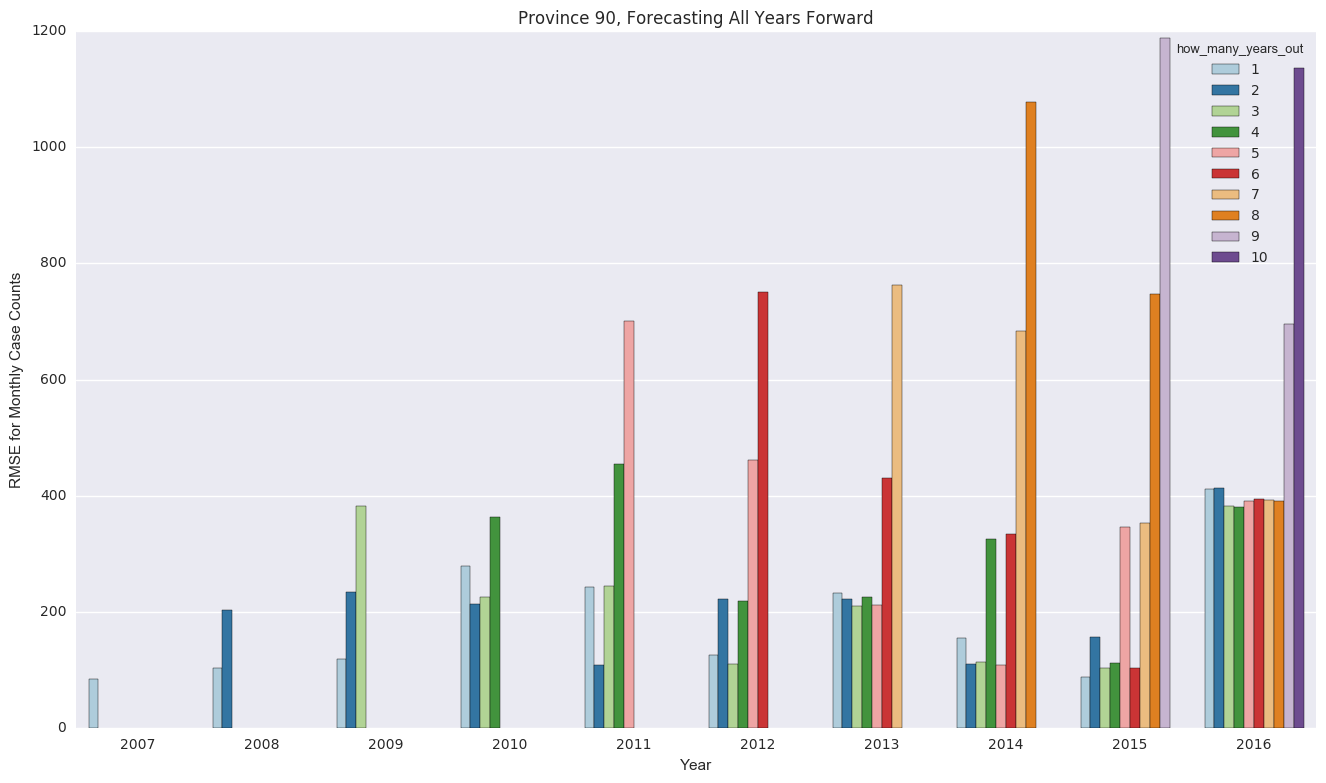

In [206]:
province = 90

prov_df = all_years_out_df.loc[all_years_out_df['province'] == province]
plt.subplots(figsize=(16,9))
plt.rcParams['axes.facecolor'] = 'white'
ax = sns.barplot(x='year', y='monthly_case_rmse', data=prov_df, ci=0, hue='how_many_years_out', palette='Paired')
ax.set(xlabel='Year', ylabel='RMSE for Monthly Case Counts')
plt.title('Province ' + str(province) + ', ' + 'Forecasting All Years Forward')
plt.show()